In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as plticker
from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter
import random
%matplotlib inline

In [2]:
#Read Data from adult.data file

columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Sex', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Income']

train_data = pd.read_csv('Dataset/adult.data', sep=', ', names=columns, engine='python')
test_data = pd.read_csv('Dataset/adult.test', sep=', ', names=columns, engine='python')


In [3]:
def clean_data (dataset) :
    
    #Remove the rows having '?'
    dataset = dataset[~(dataset[columns] == '?').any(axis=1)]
    
    #Remove rows having 'NaN'
    dataset = dataset.dropna()
    
    #Reset index
    dataset = dataset.reset_index(drop=True)
    
    # Replace '>50K.' with '>50K' and '<=50K.' with '<=50K' 
    dataset = dataset.replace('>50K.', '>50K')
    dataset = dataset.replace('<=50K.', '<=50K')
    
    return dataset

In [4]:
def concatDataframe (dataset1, dataset2):
    return pd.concat([dataset1, dataset2], ignore_index=True)

In [54]:
def col_vs_income(labels, less_than_fifty, greater_than_fifty, title, xlabel, ylabel, reduce_clutter):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    if(reduce_clutter):
        fig, ax = plt.subplots(figsize=(15,8))
    else:
        fig, ax = plt.subplots(figsize=(15,8))
    rects1 = ax.bar(x - width/2, less_than_fifty, width, label='<=50K')
    rects2 = ax.bar(x + width/2, greater_than_fifty, width, label='>50K')

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.xticks(rotation=90)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    if(not reduce_clutter):
        autolabel(rects1)
        autolabel(rects2)
        fig.tight_layout()
        ax.set_xticks(x)
        
    else:
        ax.set_xticks(x)
        if(len(x) == 145):
            plt.xlim(xmax=71)
        
        fig.tight_layout()


    plt.show()

In [6]:
def get_count_df_normalized(concatenate_dataset, colname, percent=True):
    col_income = concatenate_dataset.groupby([colname,'Income']).size().unstack(level=0).T
    #Normalize data
    col_income['Total'] = col_income['<=50K'] + col_income['>50K']
    
    if (percent):        
        col_income['<=50K%'] = round((col_income['<=50K'] / col_income['Total']) * 100)
        col_income['>50K%'] = round((col_income['>50K'] / col_income['Total']) * 100)
    else:
        col_income['<=50K%'] = col_income['<=50K'] / col_income['Total']
        col_income['>50K%'] =  col_income['>50K'] / col_income['Total']
            
    col_income[colname] = col_income.T.columns

    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K%'].tolist(),
            '>50K':col_income['>50K%'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [7]:
def get_count_df_absolute(concatenate_dataset, colname):
    col_income = concatenate_dataset.groupby([colname,'Income']).size().unstack(level=0).T
    col_income[colname] = col_income.T.columns
    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K'].tolist(),
            '>50K':col_income['>50K'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [8]:
def plot_bar_chart(colname, title, xlabel, ylabel, abs_or_norm = False, reduce_clutter=False):
    if(abs_or_norm):
        col_income_dict = get_count_df_absolute(concatenate_dataset, colname) 
    else:
        col_income_dict = get_count_df_normalized(concatenate_dataset, colname)
    #Plot the comparision between WorkClass and Income
    col_vs_income(col_income_dict[colname].tolist(), col_income_dict['<=50K'].tolist(), col_income_dict['>50K'].tolist(), title, xlabel, ylabel, reduce_clutter)

In [9]:
def plot_box_plot(colname, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    sns.boxplot(ax=ax, x='Income', y=colname, data = train_data)

In [10]:
def emptyLabelMosaic(k):
    return ''

def create_mulitvariate_mosaicplots(col1, col2, col3,title):
    plt.rcParams["figure.figsize"]=(15, 10)
    mosaic(concatenate_dataset, [col1,col2,col3],
           gap=0.015, 
           label_rotation=45.0, 
           horizontal=False,
           title=title, 
           labelizer=emptyLabelMosaic,)
    plt.show()

In [11]:
def plot_line_chart(colname, xlabel, ylabel, title):
    educationNum_vs_income = get_count_df_normalized(concatenate_dataset, 'EducationNum', percent=False)
    plt.figure(figsize=(15,5))
    plt.plot(colname, '<=50K', data=educationNum_vs_income, color='skyblue', linewidth=2)
    plt.plot(colname, '>50K', data=educationNum_vs_income,  color='olive', linewidth=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [12]:
def plot_pie_chart(column):
    upper = Counter(above[column])
    lower = Counter(below[column])
    
    keys = list(upper.items())
    random.shuffle(keys)
    upper = dict(keys)
    
    keys = list(lower.items())
    random.shuffle(keys)
    upper = dict(keys)
    
    print()
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 12))
    explode_val = [0.2] * (len(upper.keys()))
    axes[0].pie(upper.values(), labels=upper.keys(), autopct='%1.0f%%', explode = explode_val, counterclock = False)
    axes[0].legend(upper.keys(), loc="upper right", bbox_to_anchor=(1.2, 1))
    axes[0].set_title(">50K")
    axes[1].pie(lower.values(), labels=lower.keys(), autopct='%1.0f%%', explode = explode_val, counterclock = False)
    axes[1].legend(lower.keys(), loc="upper right", bbox_to_anchor=(1.2, 1))
    axes[1].set_title("<=50K")
    plt.show()

In [35]:
def plot_pie_chart_unique(column):
    unique_values = concatenate_dataset[column].unique()
    plt.close()
    
    if(column == 'Age'):
        fig, axes = plt.subplots(ncols=1, nrows=len(unique_values), figsize=(5, 5 * len(unique_values)))
    else:
        fig, axes = plt.subplots(ncols=1, nrows=len(unique_values), figsize=(10, 18 * len(unique_values)))

    for i, val in enumerate(unique_values):
        val_df = concatenate_dataset[concatenate_dataset[column] == val]
        upper = val_df[val_df["Income"] == ">50K"]
        lower = val_df[val_df["Income"] == "<=50K"]
        axes[i].pie([len(lower.index), len(upper.index)], labels=["<=50K (Count-" + str(len(lower.index)) + ")", ">50K (Count-" + str(len(upper.index)) + ")"], autopct='%1.0f%%')
        axes[i].set_title(val)
    
    plt.show()

In [39]:
def get_freq_for_col(columnname):
    pd.options.display.max_rows = 4000
    print(concatenate_dataset[columnname].value_counts(normalize=True) * 100)

In [14]:
train_data = clean_data(train_data)
test_data = clean_data(test_data)
concatenate_dataset = concatDataframe(train_data, test_data)

<ipython-input-5-9f9a94704d0b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


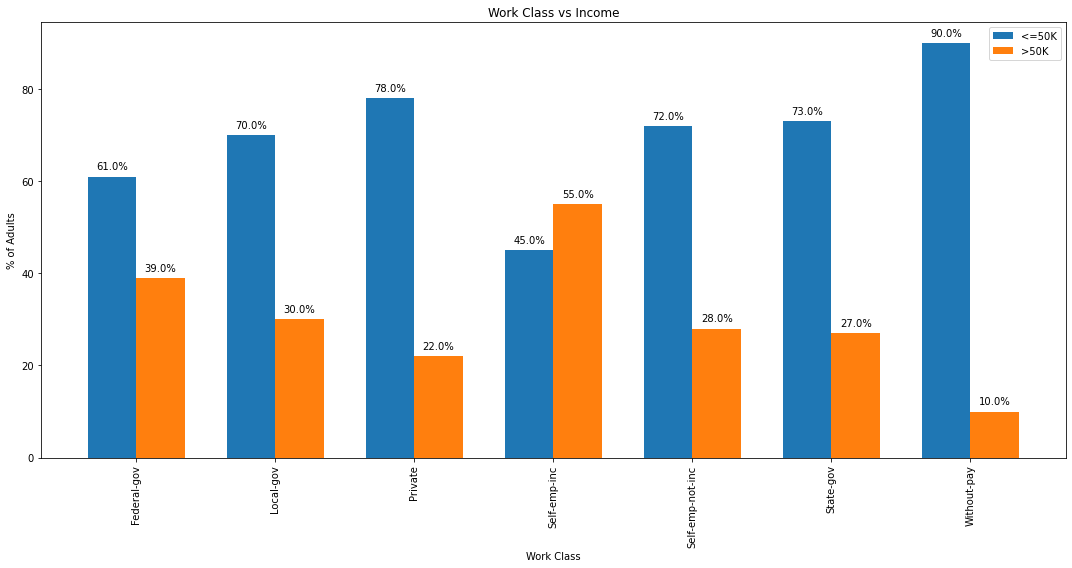

In [15]:
#plot_bar_chart( colname, chart_title, x_label, y_label, absolute_or_normalized(default false))
plot_bar_chart('WorkClass', 'Work Class vs Income', 'Work Class', '% of Adults')

<ipython-input-54-e8440e244c27>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


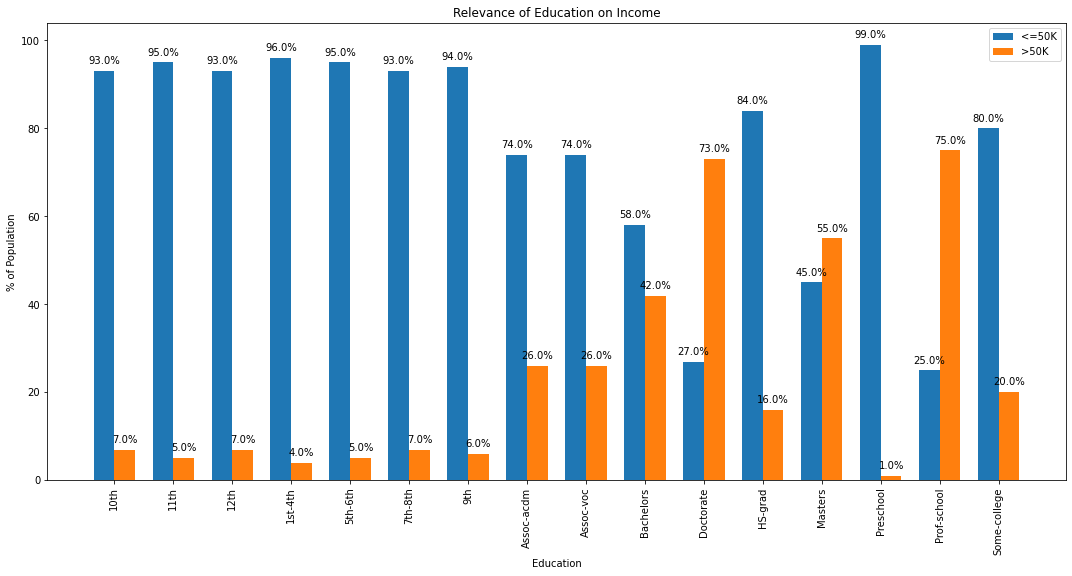

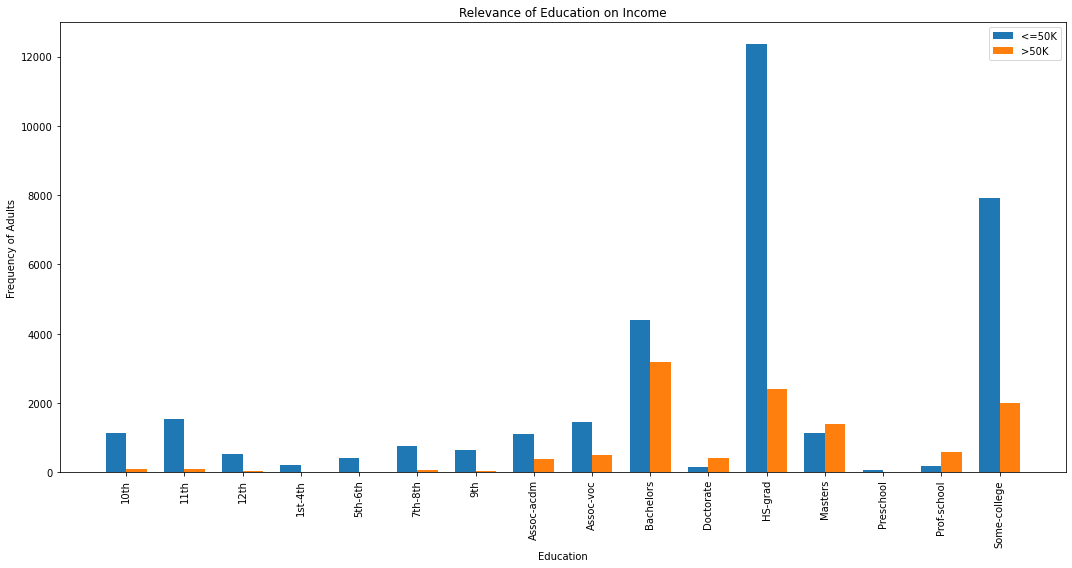

In [64]:
plot_bar_chart('Education', 'Relevance of Education on Income', 'Education', '% of Population')
plot_bar_chart('Education', 'Relevance of Education on Income', 'Education', 'Frequency of Adults', True, True)

<ipython-input-5-9f9a94704d0b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


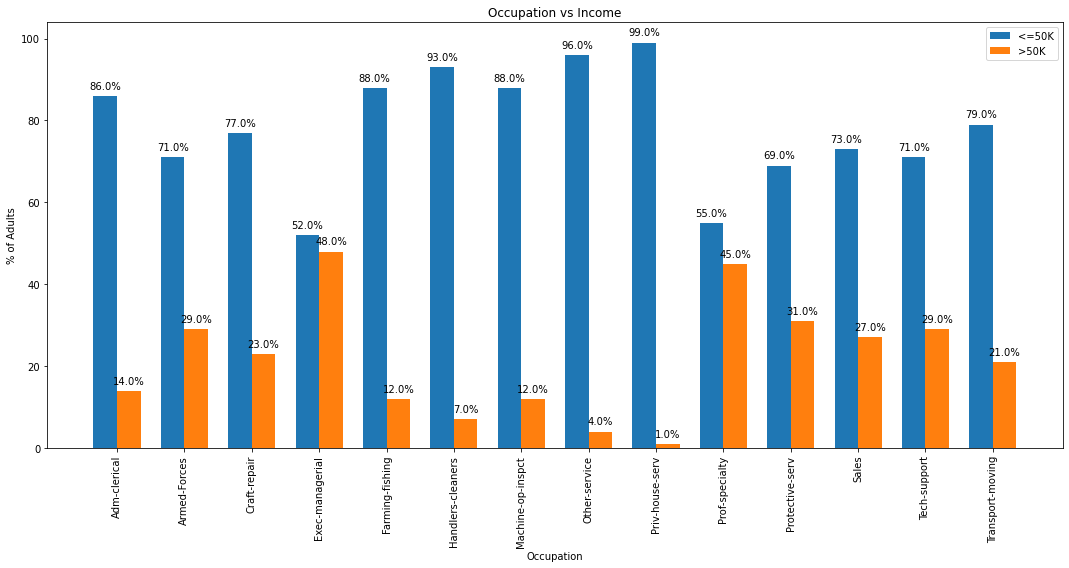

In [16]:
plot_bar_chart('Occupation', 'Occupation vs Income', 'Occupation', '% of Adults')

<ipython-input-54-e8440e244c27>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


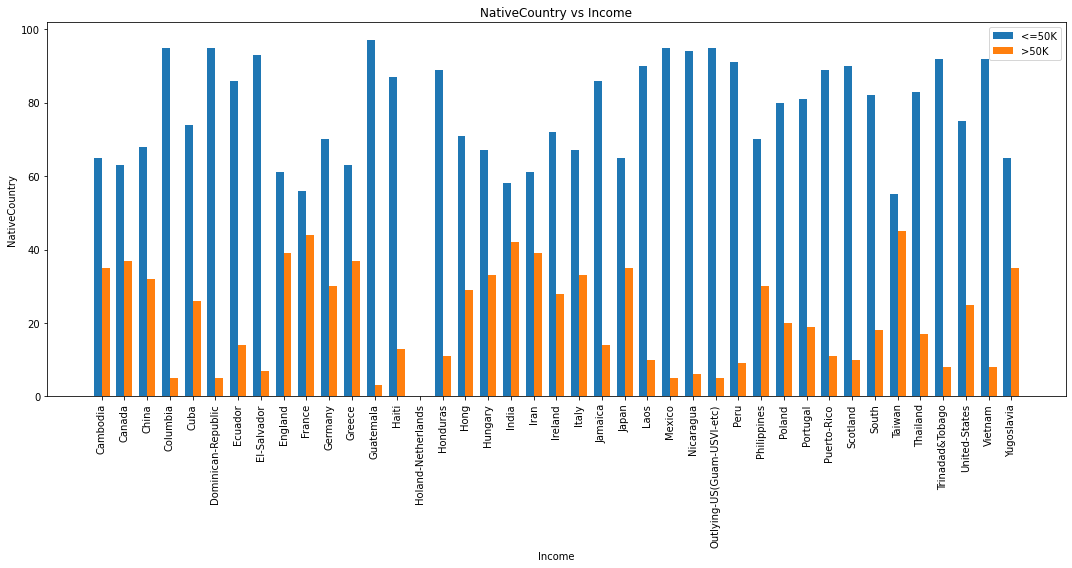

In [66]:
plot_bar_chart('NativeCountry', 'NativeCountry vs Income', 'Income', 'NativeCountry', reduce_clutter=True)

<ipython-input-54-e8440e244c27>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


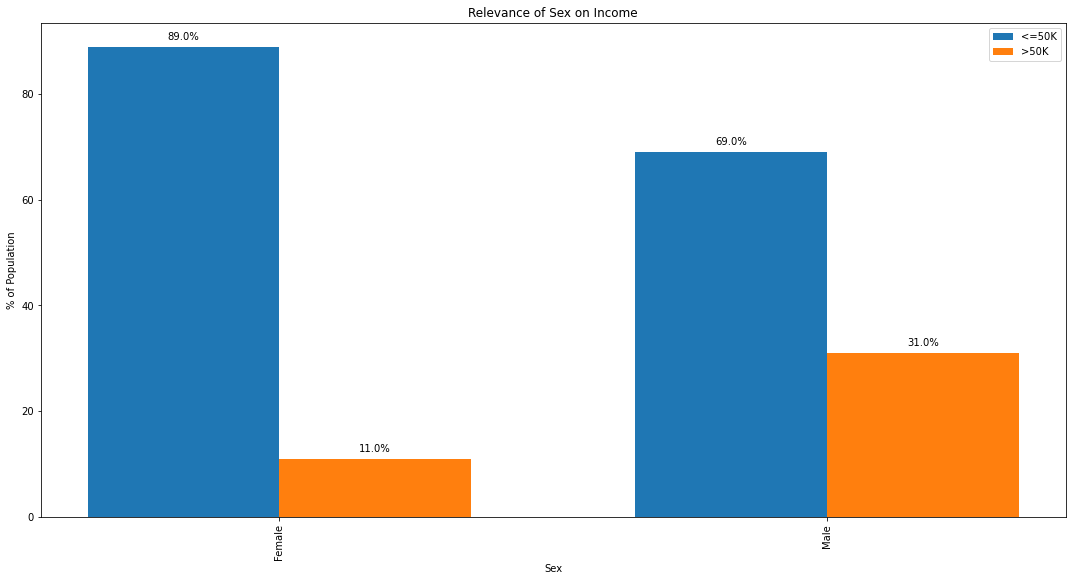

In [59]:
plot_bar_chart('Sex', 'Relevance of Sex on Income', 'Sex', '% of Population')

<ipython-input-5-9f9a94704d0b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


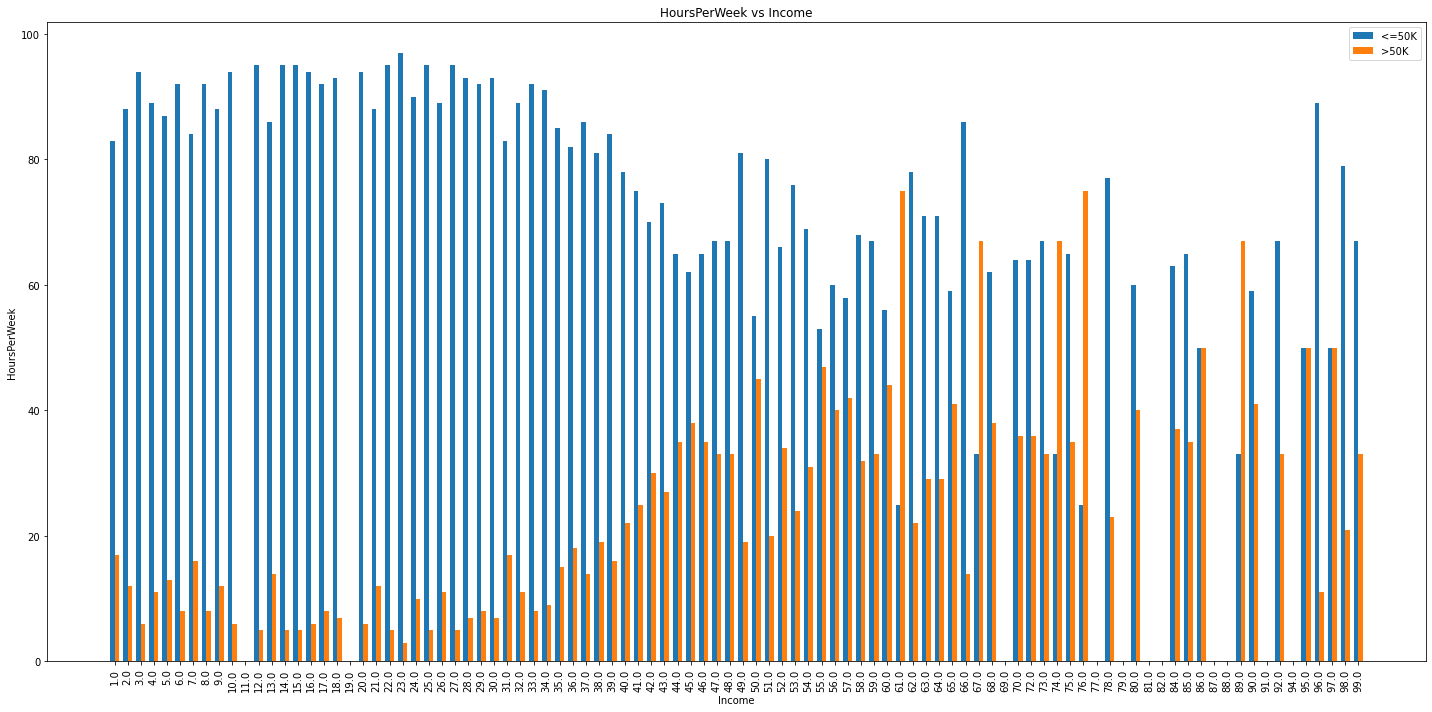

In [18]:
plot_bar_chart('HoursPerWeek', 'HoursPerWeek vs Income', 'Income', 'HoursPerWeek', reduce_clutter=True)

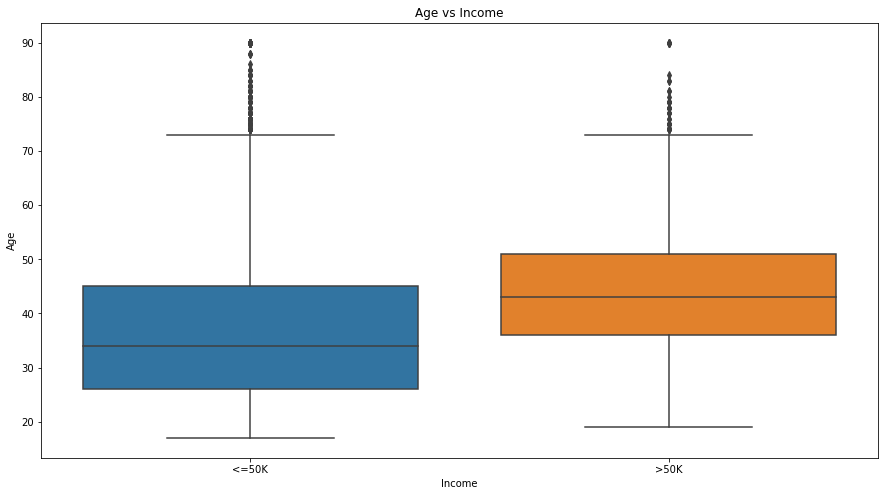

In [19]:
#plot_bar_chart( colname, chart_title, x_label, y_label)
plot_box_plot('Age', 'Age vs Income', 'Income', 'Age')

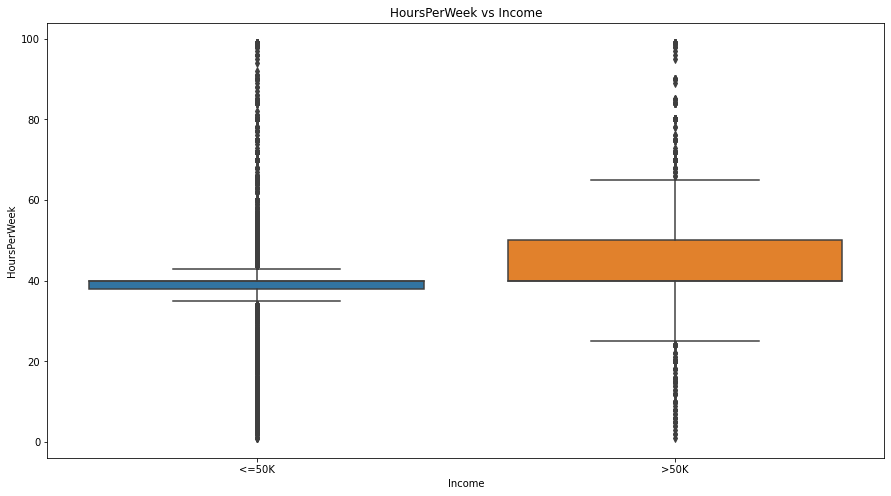

In [20]:
plot_box_plot('HoursPerWeek', 'HoursPerWeek vs Income', 'Income', 'HoursPerWeek')

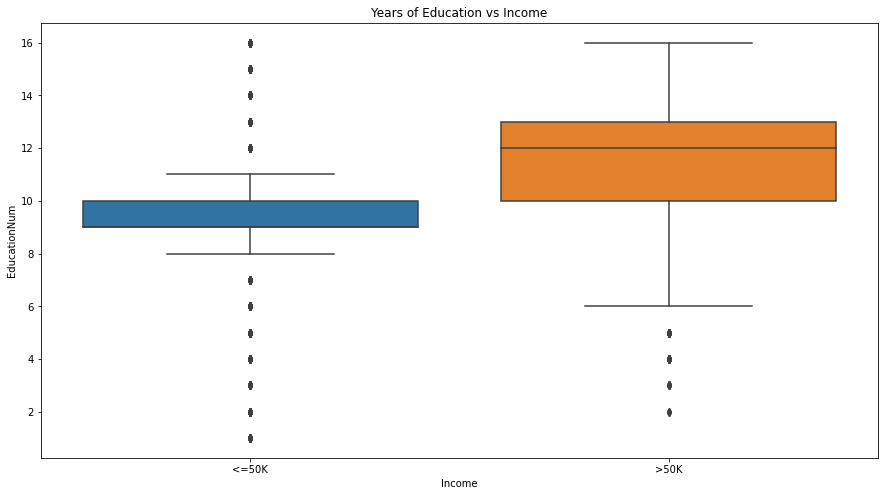

In [65]:
plot_box_plot('EducationNum', 'Years of Education vs Income', 'Income', 'Years of Education')

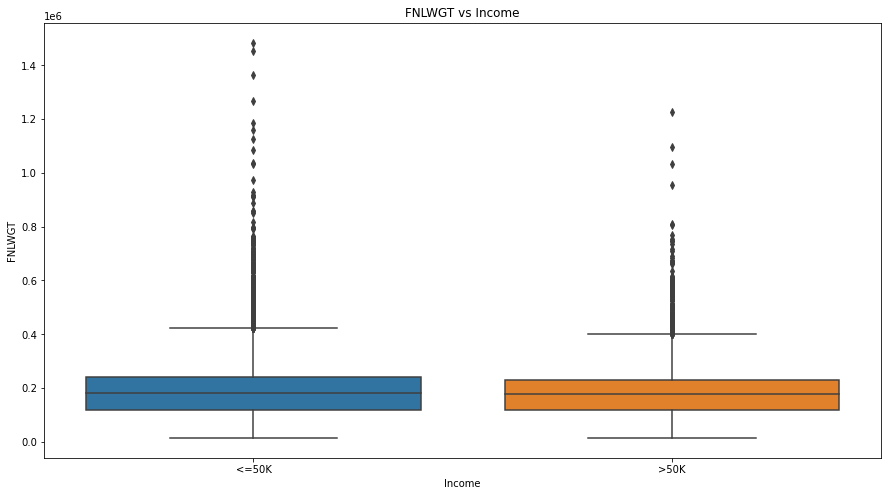

In [22]:
plot_box_plot('FNLWGT', 'FNLWGT vs Income', 'Income', 'FNLWGT')

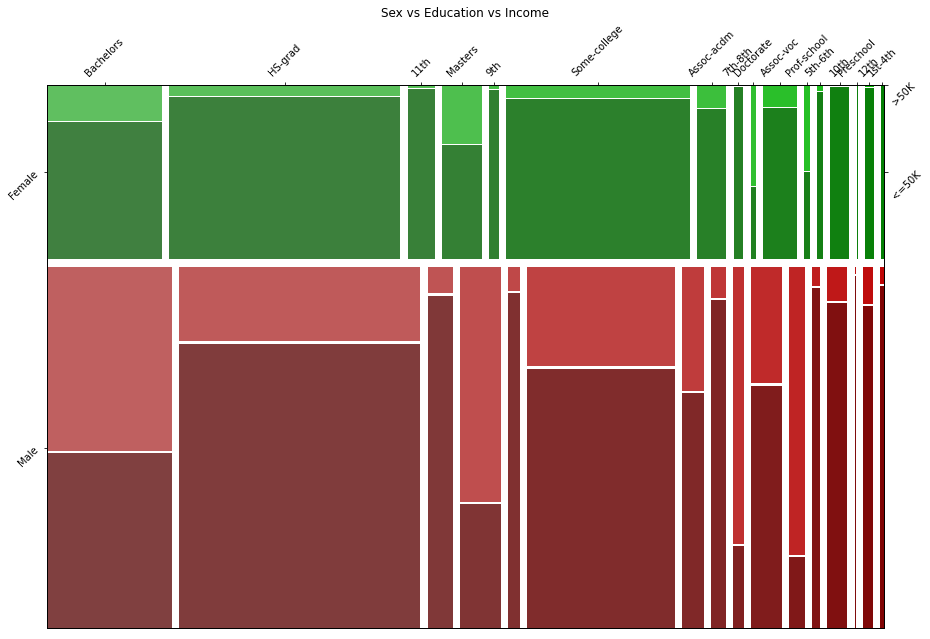

In [23]:
create_mulitvariate_mosaicplots('Sex','Education','Income', 'Sex vs Education vs Income')

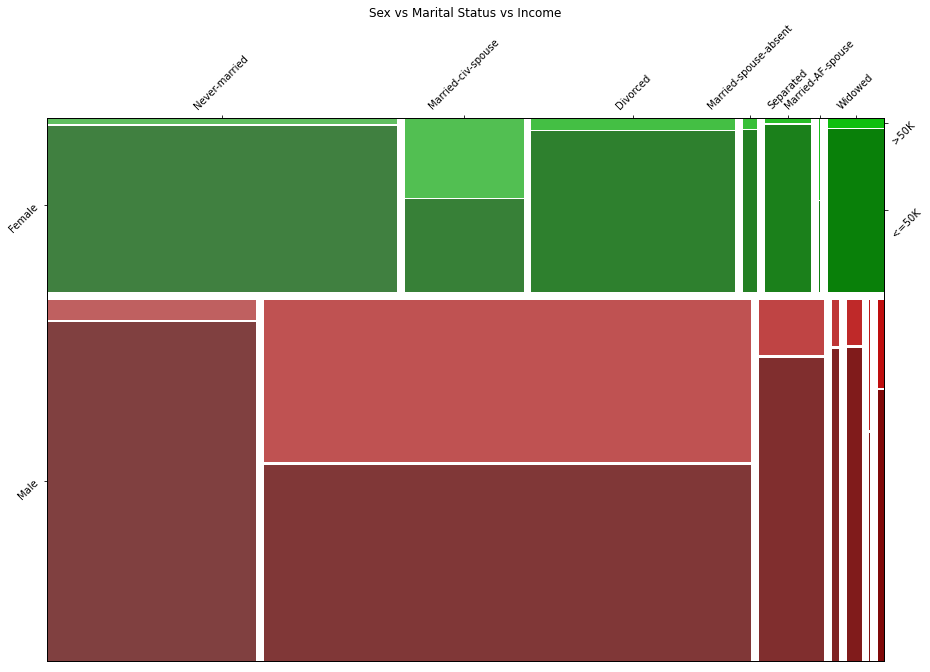

In [24]:
create_mulitvariate_mosaicplots('Sex','MaritalStatus','Income', 'Sex vs Marital Status vs Income')

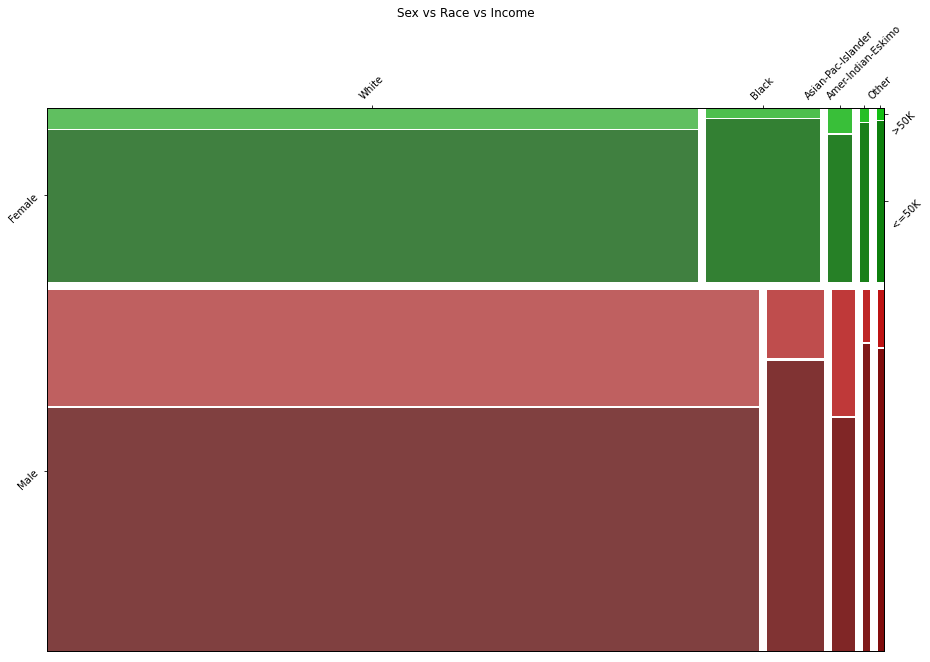

In [25]:
create_mulitvariate_mosaicplots('Sex','Race','Income', 'Sex vs Race vs Income')

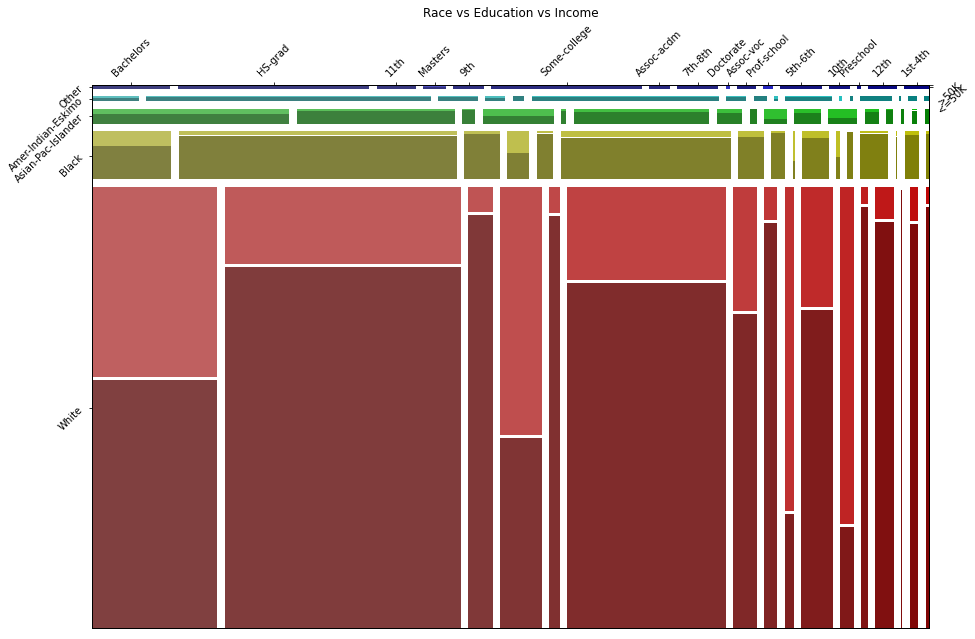

In [26]:
create_mulitvariate_mosaicplots('Race','Education','Income', 'Race vs Education vs Income')

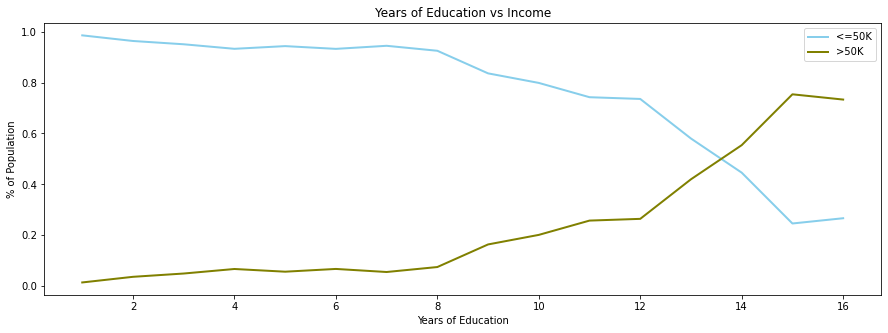

In [27]:
plot_line_chart('EducationNum', 'Years of Education', '% of Population', 'Years of Education vs Income')

<ipython-input-54-e8440e244c27>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


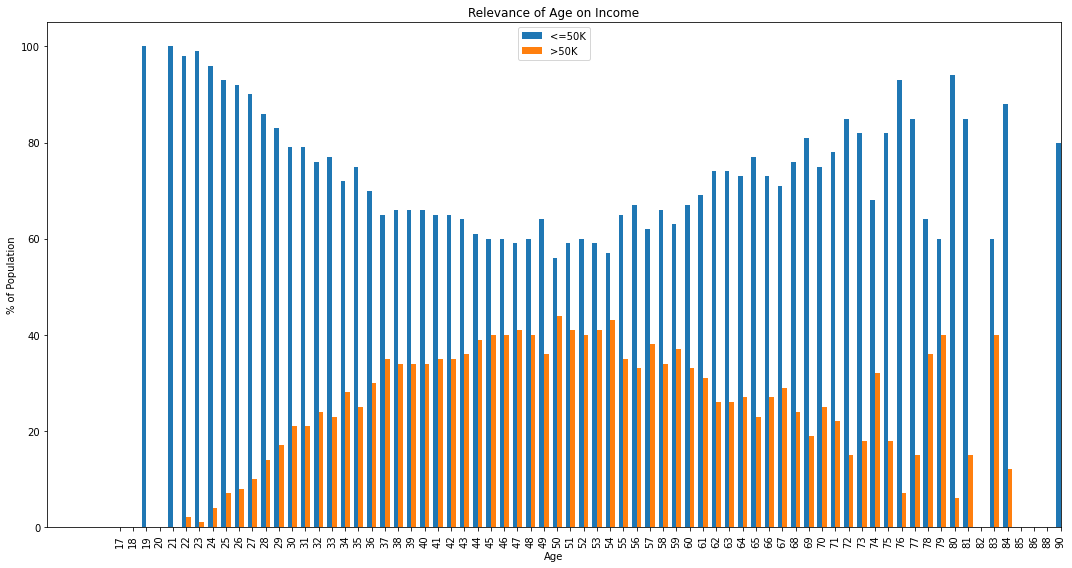

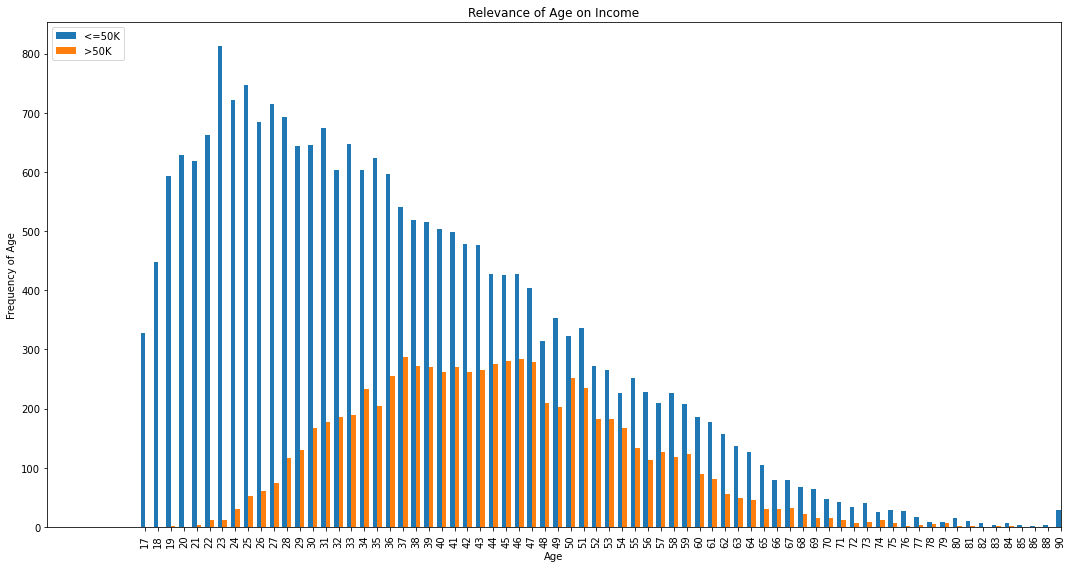

In [56]:
plot_bar_chart('Age', 'Relevance of Age on Income', 'Age', '% of Population', False, True)
plot_bar_chart('Age', 'Relevance of Age on Income', 'Age', 'Frequency of Age', True, True)

<ipython-input-5-9f9a94704d0b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


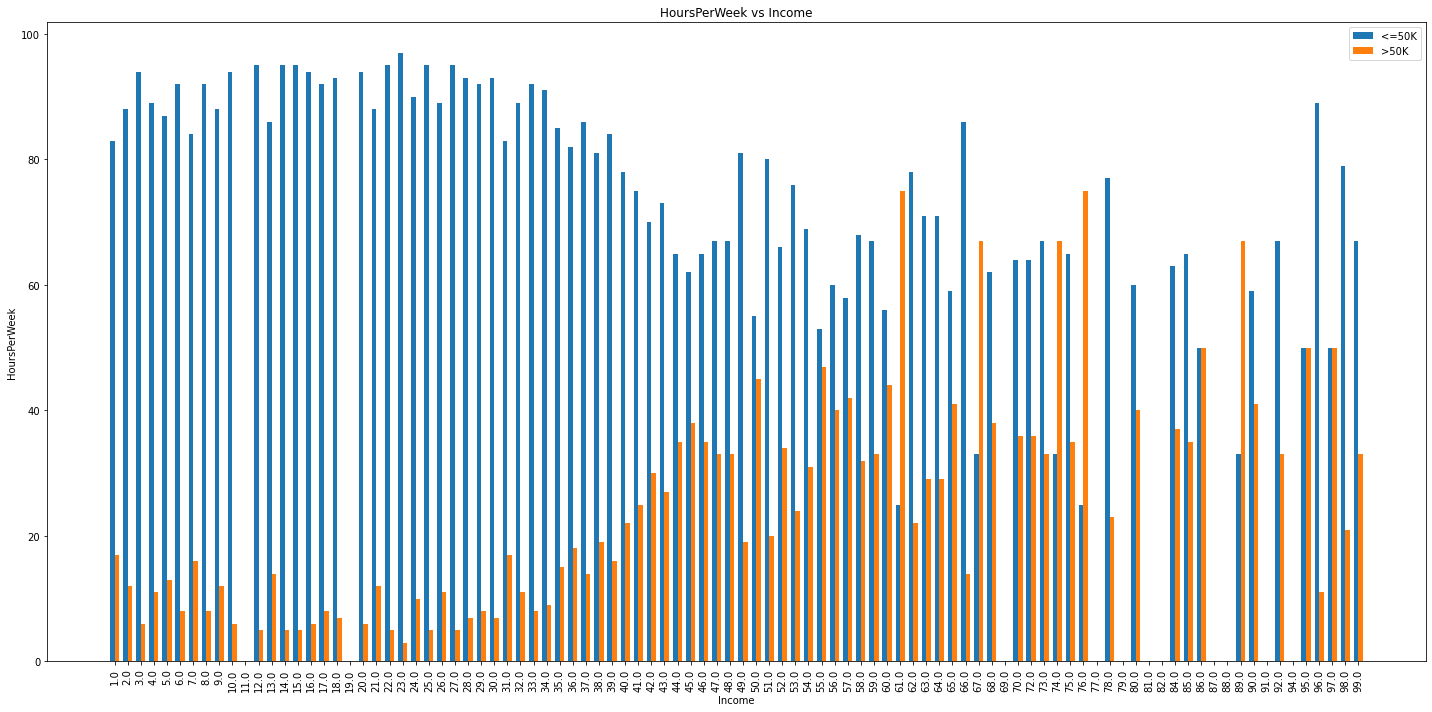

In [29]:
plot_bar_chart('HoursPerWeek', 'HoursPerWeek vs Income', 'Income', 'HoursPerWeek', reduce_clutter=True)

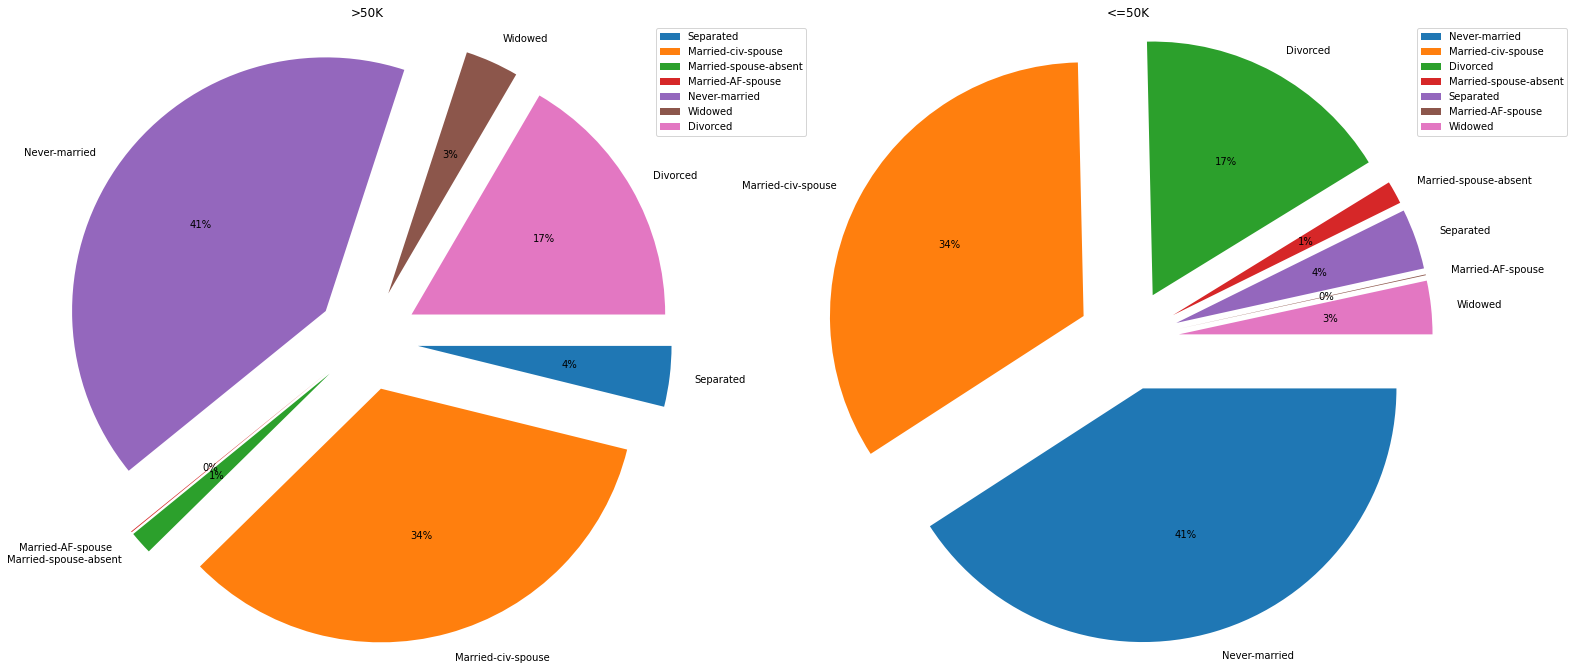

In [34]:
below = concatenate_dataset[concatenate_dataset["Income"] == "<=50K"]
above = concatenate_dataset[concatenate_dataset["Income"] == ">50K"]
plot_pie_chart("MaritalStatus")

<ipython-input-5-9f9a94704d0b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


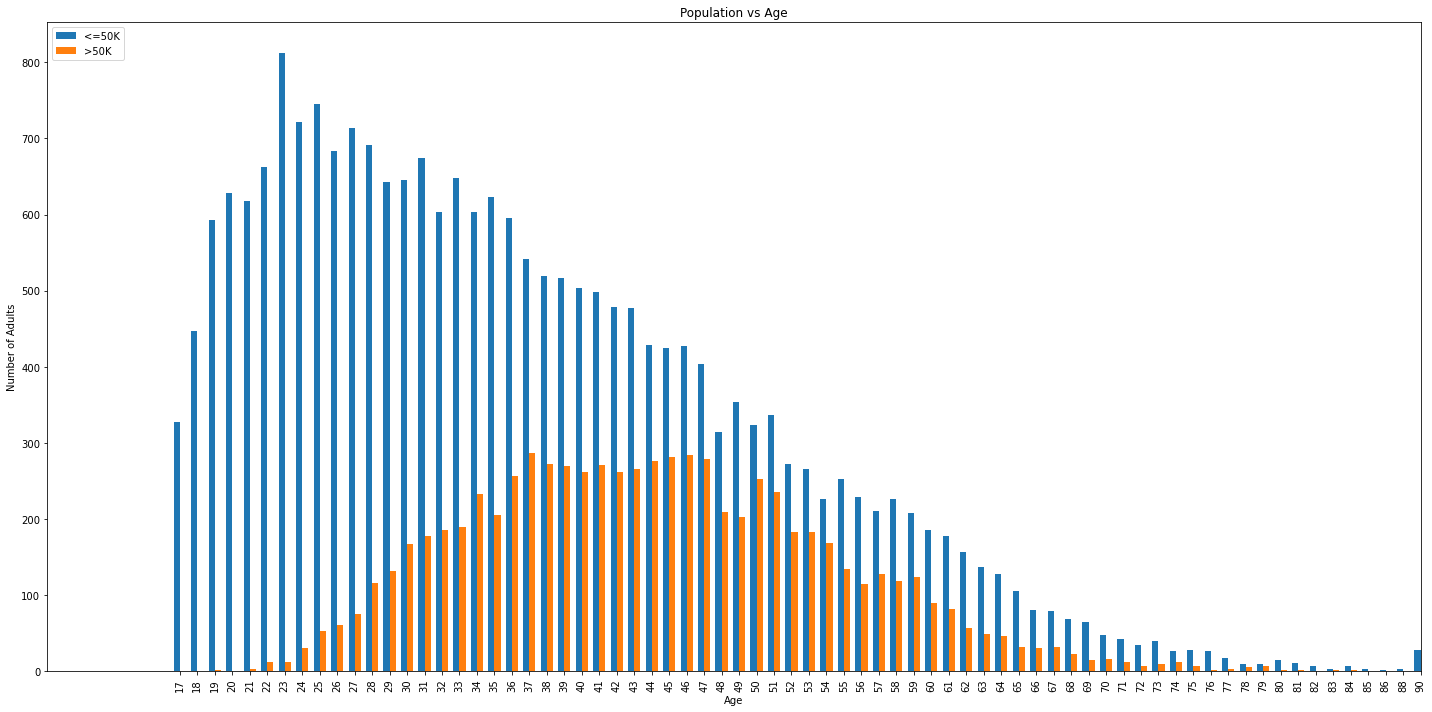